In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

# Gradient Descent

Imagine your model parameters are represented by a ball sitting on a hill. Intuitively, we want to push the ball downhill. And that makes sense, but when we're talking about our cost function, how do we know which way is downhill?   

Luckily, the gradient provides this exact information.

Technically, the gradient actually points uphill, in the direction of steepest ascent. But if we put a - sign in front of this value, we get the direction of steepest descent, which is what we want.  

You'll learn more about the gradient in a moment, but, for now, just think of it as a vector of numbers. Each number represents the amount by which we should adjust a corresponding weight or bias in the neural network. Adjusting all of the weights and biases by the gradient values reduces the cost (or error) of the network.  

Got all that?  

Great! Now we know where to push the ball. The next thing to consider is how much force should be applied to the push. This is known as the learning rate, which is an apt name since this value determines how quickly or slowly the neural network learns.  

You might be tempted to set a really big learning rate, so the network learns really fast, right?  

Be careful! If the value is too large you could overshoot the target and eventually diverge. Yikes!  

So what is a good learning rate, then?   

This is more of a guessing game than anything else but empirically values in the range $0.1$ to $0.0001$ work well. The range $0.001$ to $0.0001$ is popular, as $0.1$ and $0.01$ are sometimes too large.   

Here's the formula for gradient descent (pseudocode):   

$$x = x - learning\_rate * gradient\_of\_x$$
x is a parameter used by the neural network (i.e. a single weight or bias).   

We multiply gradient_of_x (the uphill direction) by learning_rate (the force of the push) and then subtract that from x to make the push go downhill.   

### Convergence. 
This is the ideal behaviour.  
![convergence](images/optimization_algorithms/gradient-descent-convergence.gif)

### Divergence.   
This can happen when the learning rate is too large.

![divergence](images/optimization_algorithms/gradient-descent-divergence.gif)

In [76]:
def gradient_descent_update(x, gradx, learning_rate):
    """
    Performs a gradient descent update.
    """
    x = x - learning_rate * gradx
    # Return the new value for x
    return x

We adjust the old x pushing it in the direction of gradx with the force learning_rate. Subtracting learning_rate * gradx. Remember the gradient is initially in the direction of steepest ascent so subtracting learning_rate * gradx from x turns it into steepest descent. You can make sure of this yourself by replacing the subtraction with an addition.

The gradient descent algorithm is applied to find a local minimum of the function $f(x)=x^4−3x^3+2$, with derivative $f'(x)=4x^3−9x^2$.

In [6]:
# From calculation, it is expected that the local minimum occurs at x=9/4

x_old = 0 # The value does not matter as long as abs(x_new - x_old) > precision
x_new = 6 # The algorithm starts at x=6
gamma = 0.01 # step size
precision = 0.00001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print("The local minimum occurs at %f" % x_new)

The local minimum occurs at 2.249965


Lets verify this visually

In [7]:
def f(x):
    return pow(x,4) - pow(3*x, 3) + 2


In [48]:
x = np.arange(-0.5,0.7,0.01)
y = f(x)

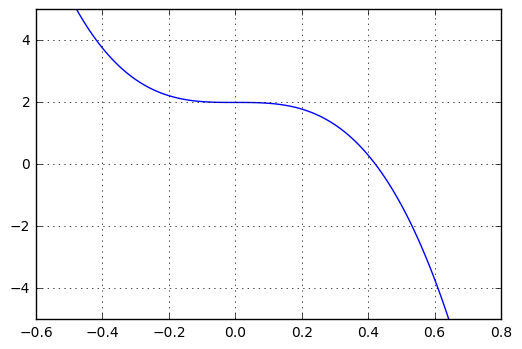

In [53]:
plt.plot(x,y)
plt.ylim(-5,5)
plt.grid()
plt.show()

In [54]:
# A more detailed example
#https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

In [65]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

def run():
    points = np.genfromtxt("dataset/optimization_algorithms/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


In [66]:
run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


# TIPS

For input data and random values, makure they have  
- Zero Mean
- Equal Variance of small value 
- Momentum - Running Average
- Learning Rate Decay

## Hyper Parameters
- Initial Learning Rate
- "Learning Rate Decay" First one to modify to fit the model
- Momentum
- Batch Size
- Weight Initialize

Using ADAGRAD can help tuning first three parameters for us!